In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import sklearn.preprocessing as p
from sklearn.model_selection import train_test_split

import wrangle as w
import explore as e
import acquire as a
import warnings
warnings.filterwarnings("ignore")
import env

%matplotlib inline
# %config InlineBackend.figure_format = 'svg'

In [2]:
train, validate, test = w.wrangle_zillow()

In [3]:
train.shape, validate.shape, test.shape

((28817, 9), (12351, 9), (10292, 9))

In [4]:
#Delete below this just testing new function

In [5]:
# train_encoded, validate_encoded, test_encoded = w.wrangle_zillow_encoded()
#not working

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28817 entries, 31793 to 25682
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   parcel_id    28817 non-null  int64  
 1   property_id  28817 non-null  int64  
 2   bathrooms    28817 non-null  float64
 3   bedrooms     28817 non-null  Int64  
 4   zip_code     28817 non-null  Int64  
 5   year_built   28817 non-null  Int64  
 6   total_sqft   28817 non-null  Int64  
 7   county       28817 non-null  object 
 8   tax_value    28817 non-null  float64
dtypes: Int64(4), float64(2), int64(2), object(1)
memory usage: 2.3+ MB


In [7]:
train.head()

,parcel_id,property_id,bathrooms,bedrooms,zip_code,year_built,total_sqft,county,tax_value
31793,11121796,1061586,3.0,4,96373,1978,2322,Los_Angeles,428575.0
52132,11242608,685818,3.0,4,97298,2007,3537,Los_Angeles,647000.0
36759,13083122,338261,2.0,4,96488,1964,1326,Los_Angeles,245335.0
27845,10999046,2433183,3.0,4,96282,1937,1774,Los_Angeles,389856.0
10940,14275253,146283,2.0,4,96981,1953,1795,Orange,571678.0


In [8]:
train.zip_code.nunique()

372

In [9]:
train.tax_value.min()

3254.0

Data looks nice and clean.  Time to explore.  Dont forget to get dummies before scaling and modeling

In [10]:
train.bedrooms.min()

2

In [11]:
train.bathrooms.min()

1.0

In [12]:
data_dictionary = pd.read_csv('zillow_data_dictionary.csv')
# data_dictionary

In [45]:
# data_dictionary.Description[-5:]

Begin exploration

What are some questions I have of the data?

1) Is county related to tax_value?
2) Does total_sqft relate to tax_value?
3) Does number of bedrooms relate to tax_value?
4) Does number of bathrooms relate to tax_value?
5) Does year_built relate to value?




Ask a question. Plot viz for initial explore.  form hypotheses and do stat test.  if relationship, include in model and final report viz

In [14]:
county_encoded = pd.get_dummies(train.county, drop_first=False)

In [15]:
train_encoded = train.merge(county_encoded, left_index=True, right_index=True)
train_encoded.head()

,parcel_id,property_id,bathrooms,bedrooms,zip_code,year_built,total_sqft,county,tax_value,Los_Angeles,Orange,Ventura
31793,11121796,1061586,3.0,4,96373,1978,2322,Los_Angeles,428575.0,1,0,0
52132,11242608,685818,3.0,4,97298,2007,3537,Los_Angeles,647000.0,1,0,0
36759,13083122,338261,2.0,4,96488,1964,1326,Los_Angeles,245335.0,1,0,0
27845,10999046,2433183,3.0,4,96282,1937,1774,Los_Angeles,389856.0,1,0,0
10940,14275253,146283,2.0,4,96981,1953,1795,Orange,571678.0,0,1,0


In [16]:
train_encoded = train_encoded.drop(columns='county')

In [17]:
train_encoded.head()

,parcel_id,property_id,bathrooms,bedrooms,zip_code,year_built,total_sqft,tax_value,Los_Angeles,Orange,Ventura
31793,11121796,1061586,3.0,4,96373,1978,2322,428575.0,1,0,0
52132,11242608,685818,3.0,4,97298,2007,3537,647000.0,1,0,0
36759,13083122,338261,2.0,4,96488,1964,1326,245335.0,1,0,0
27845,10999046,2433183,3.0,4,96282,1937,1774,389856.0,1,0,0
10940,14275253,146283,2.0,4,96981,1953,1795,571678.0,0,1,0


# 1) Is county related to tax_value?

Ho = County is not related to value

Ha = County is related to value

In [18]:
#Los Angeles County

# e.t_test_two_tailed(train_encoded.Los_Angeles, train_encoded.tax_value, alpha=0.05)
# do one sample not two sample test



In [19]:
def one_sample_ttest(target_sample, overall_mean, alpha = 0.05):
    t, p = stats.ttest_1samp(target_sample, overall_mean)

    return t, p, alpha

In [20]:
target_sample = train[train.county == 'Los_Angeles'].mean()
overall_mean = train.tax_value.mean()

In [21]:
e.one_sample_ttest(target_sample, overall_mean, alpha=0.05)
#LA County t test

(0.8356007786496701, 0.2154867481676862, 0.05)

In [22]:
one_sample_ttest(target_sample, overall_mean, alpha = 0.05)
#use this function for each county

(0.8356007786496701, 0.4309734963353724, 0.05)

In [23]:
def one_sample_ttest(data1, overall, alpha=0.05):
    t, p = stats.ttest_1samp(data1, overall)
    if p < alpha:
        print('Reject the null hypothesis')
    else:
        print('Fail to reject the null hypothesis')
    return t, p

In [43]:
# Orange County

target_sample_Orange = train[train.county == 'Orange'].mean()


e.one_sample_ttest(target_sample_Orange, overall_mean, alpha=0.05)

(0.8714096732651069, 0.20620866170363233, 0.05)

In [44]:
# Ventura County

target_sample_Ventura = train[train.county == 'Ventura'].mean()

e.one_sample_ttest(target_sample_Ventura, overall_mean, alpha=0.05)


(0.8888265046930064, 0.20180211473865908, 0.05)

In [26]:
# e.mean_bar_plot(train, 'county' , 'tax_value' , 'Tax Value by County')

<AxesSubplot:xlabel='county', ylabel='tax_value'>

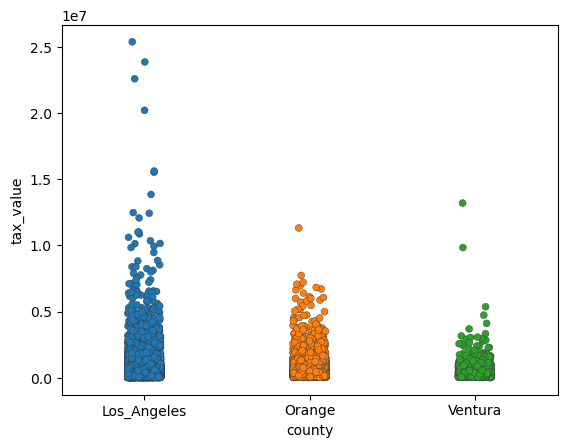

In [27]:
sns.stripplot(x= train.county , y= train.tax_value, size= 5, linewidth=.3)

# This shows the distribution of home values for each county.  LA county has the highest max value homes

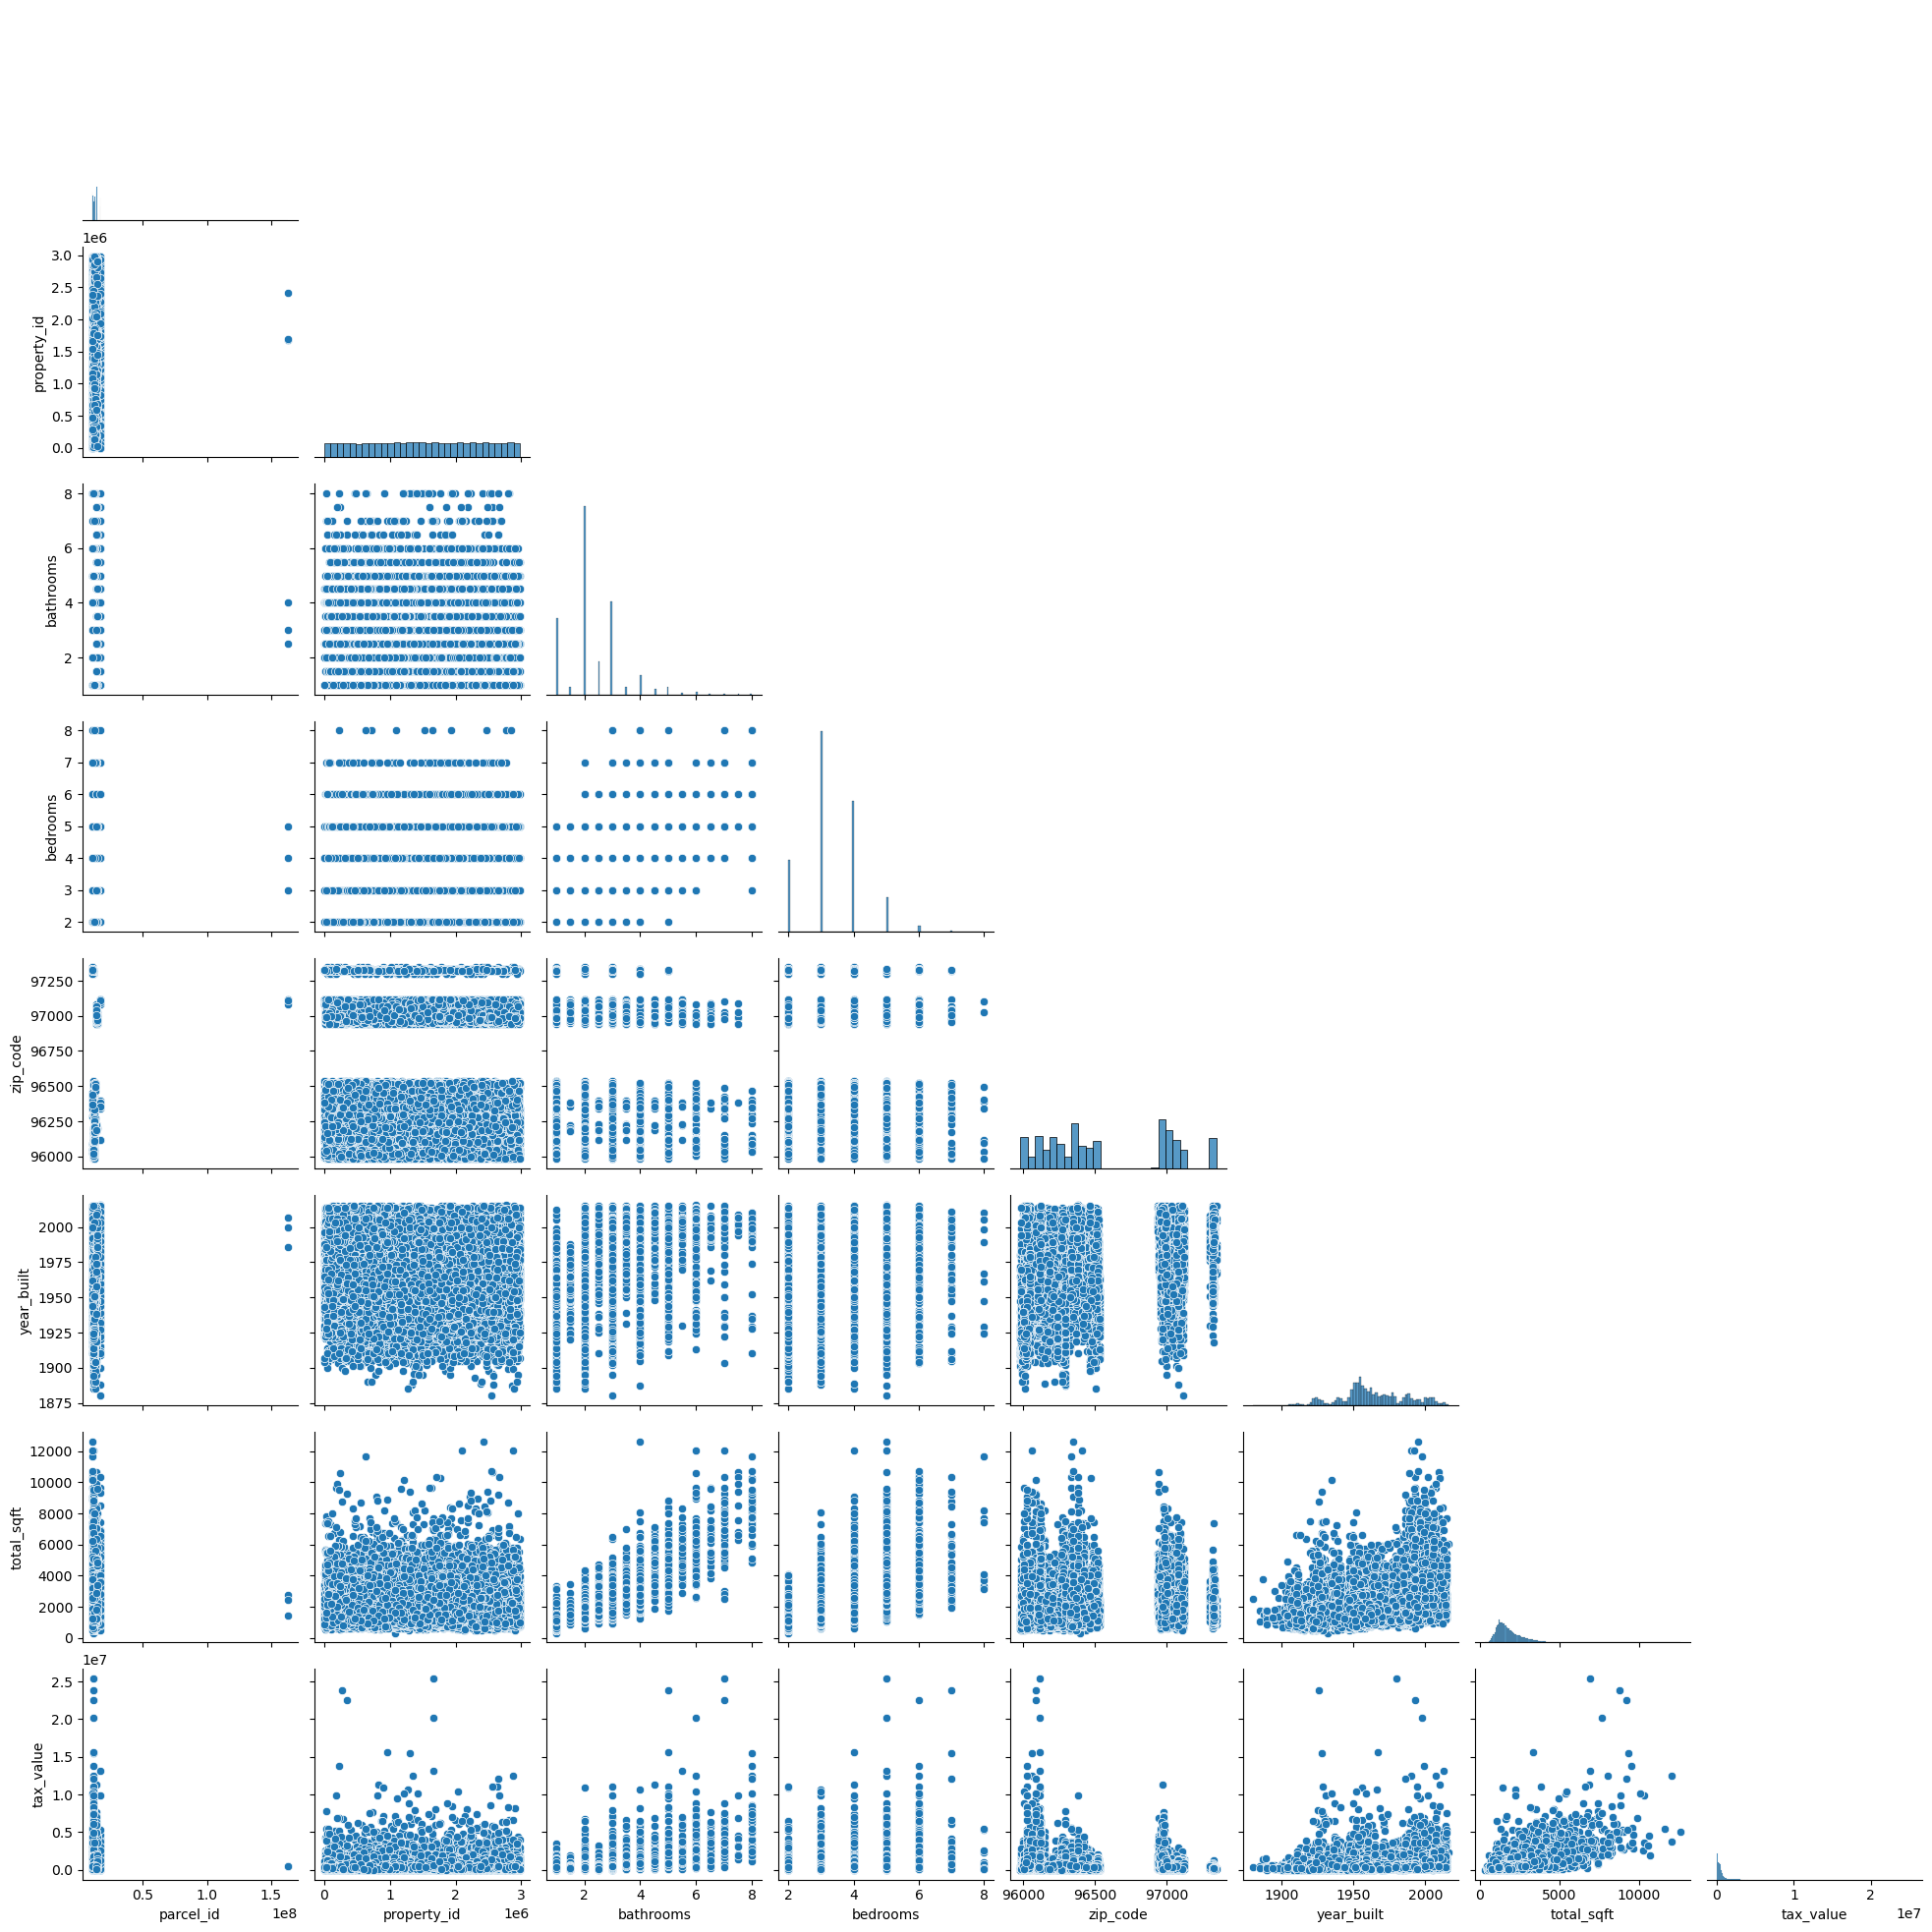

In [28]:
sns.pairplot(train, corner=True)

In [29]:
# sns.boxplot(x= train.county , y= train.tax_value, linewidth=.3)

In [30]:
train.head()

,parcel_id,property_id,bathrooms,bedrooms,zip_code,year_built,total_sqft,county,tax_value
31793,11121796,1061586,3.0,4,96373,1978,2322,Los_Angeles,428575.0
52132,11242608,685818,3.0,4,97298,2007,3537,Los_Angeles,647000.0
36759,13083122,338261,2.0,4,96488,1964,1326,Los_Angeles,245335.0
27845,10999046,2433183,3.0,4,96282,1937,1774,Los_Angeles,389856.0
10940,14275253,146283,2.0,4,96981,1953,1795,Orange,571678.0


In [31]:
train_encoded.head()

,parcel_id,property_id,bathrooms,bedrooms,zip_code,year_built,total_sqft,tax_value,Los_Angeles,Orange,Ventura
31793,11121796,1061586,3.0,4,96373,1978,2322,428575.0,1,0,0
52132,11242608,685818,3.0,4,97298,2007,3537,647000.0,1,0,0
36759,13083122,338261,2.0,4,96488,1964,1326,245335.0,1,0,0
27845,10999046,2433183,3.0,4,96282,1937,1774,389856.0,1,0,0
10940,14275253,146283,2.0,4,96981,1953,1795,571678.0,0,1,0


#### 2) Does total_sqft relate to tax_value?


Ho = square feet is not related to tax_value

Ha = square feet is related to tax_value


In [32]:
#continuous vs continuous
e.pearson_r(train.total_sqft, train.tax_value)
#this shows there is a positive correlation

#this may be the strongest driver

0.5928012742210308

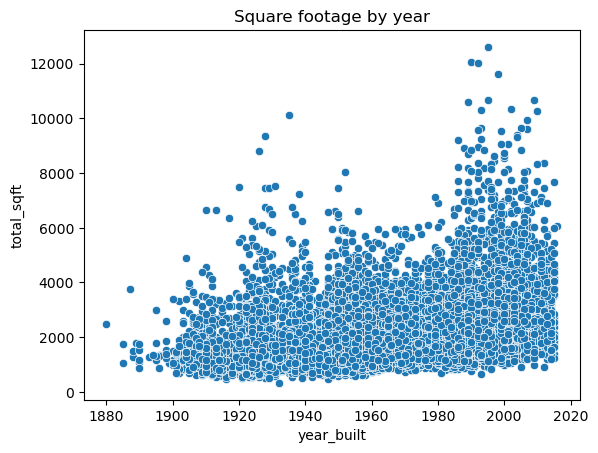

In [33]:
e.scatter_plot(train, 'year_built' , 'total_sqft' ,'Square footage by year')
#this shows that older homes are generally smaller than newer homes
#it looks about the same as the chart above.  will make another one comparing sqft to value

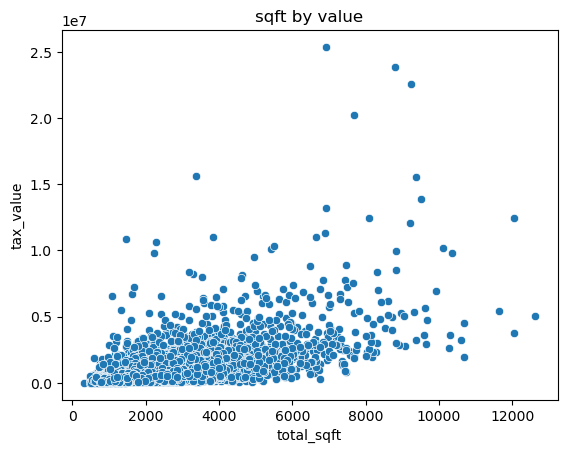

In [34]:
sqft_by_value = e.scatter_plot(train, 'total_sqft' , 'tax_value'  ,  'sqft by value')
sqft_by_value
#This definitely shows something.  larger sqft means higher value

#### 3) Does number of bedrooms relate to tax_value?


Ho = Number of bedrooms does not positively correlate with tax_value

Ha = Number of bedrooms does positibely correlate with tax_value

In [35]:
# discrete to continuous
# e.t_test_two_tailed(train.bedrooms, train.tax_value, alpha=0.05)

#### 4) Does number of bathrooms relate to tax_value?

Ho = Number of bathrooms does not positively correlate with tax_value

Ha = Number of bathrooms does positibely correlate with tax_value

In [36]:
#discrete to continuous
e.t_test_two_tailed(train.bathrooms, train.tax_value, alpha=0.05)

Reject the null hypothesis


(-125.74697802695749, 0.0)

<AxesSubplot:xlabel='bedrooms', ylabel='tax_value'>

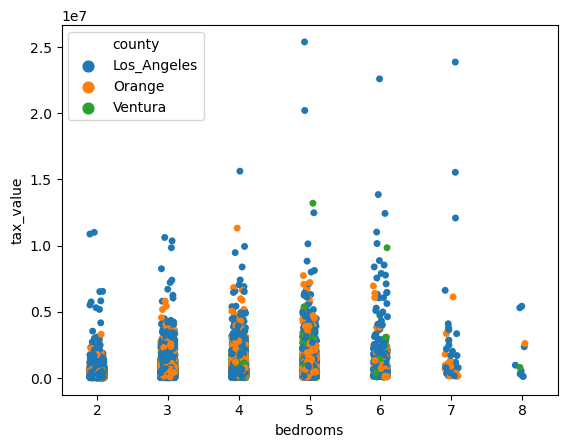

In [37]:
sns.stripplot(x= train.bedrooms, y= train.tax_value, hue= train.county)

In [38]:
# sns.relplot(x= train.county, y= train.total_sqft, hue= train.tax_value, color= 'blue')
# LA county has largest square footage homes


#### 5) Does year_built relate to tax_value?

think about making new feature with age of home using curdate - yearbuilt

perhaps homes of a certain age and higher have a higher mean value over homes below that age


Ho = year built is not related to value 

Ha = year built is related to value

In [39]:
# continuous vs continuous 
e.pearson_r(train.year_built, train.tax_value)
# weak positive correlation

0.17618854913802076

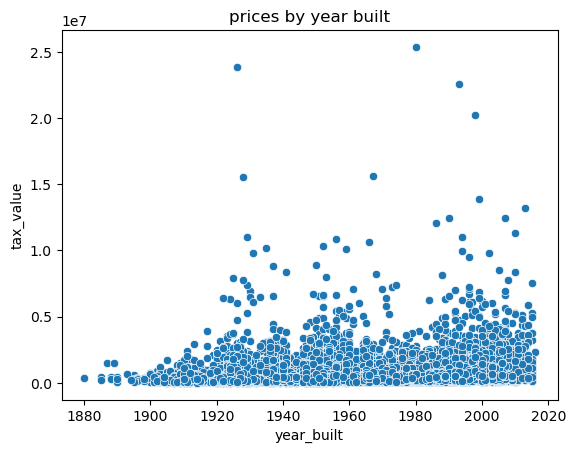

In [40]:
e.scatter_plot(train, 'year_built' , 'tax_value' , 'prices by year built')


<AxesSubplot:xlabel='year_built', ylabel='tax_value'>

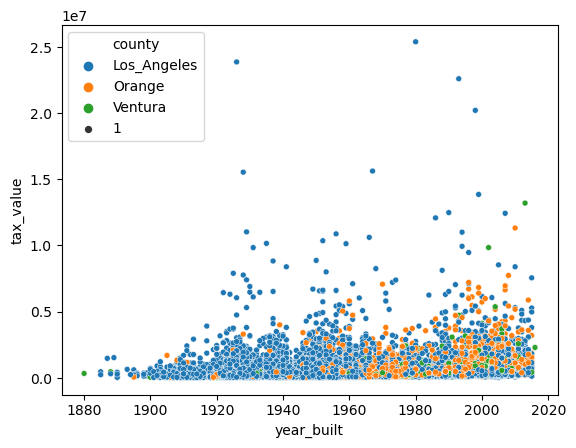

In [41]:
sns.scatterplot(data=train, x=train.year_built, y=train.tax_value, hue= train.county, size= 1)

<AxesSubplot:xlabel='year_built', ylabel='tax_value'>

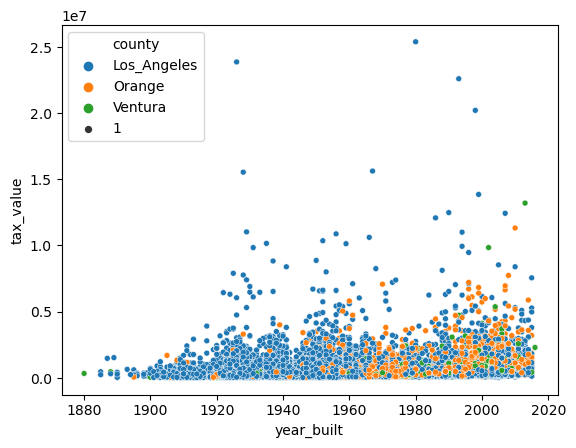

In [42]:
e.county_scatter()